# 3. Benchmarking roadmap construction methods

In JAXMAPP, we manage benchmark experiments using `hydra`. In the directory `scripts` there is a subdirectory `config` that contains all necessary configuration files to conduct benchmark experiments.

In [1]:
!ls ../scripts/config/*

../scripts/config/create_eval_data.yaml      ../scripts/config/eval.yaml
../scripts/config/create_training_data.yaml  ../scripts/config/train.yaml

../scripts/config/dataset:
eval_example.yaml   eval_more_agents.yaml  instance
eval_hetero.yaml    eval_standard.yaml	   training_hetero.yaml
eval_many_obs.yaml  eval_wo_obs.yaml

../scripts/config/model:
ctrm.yaml

../scripts/config/planner:
pp.yaml

../scripts/config/sampler:
ctrm.yaml  grid.yaml  grid_shared.yaml	random.yaml  random_shared.yaml


To evaluate your own roadmap construction methods, you first need to create a new configuration file in `../scripts/config/sampler`.
Here's an example of random sampler:

In [2]:
!cat ../scripts/config/sampler/random.yaml

_target_: jaxmapp.roadmap.random_sampler.RandomSampler

share_roadmap: false
num_samples: 3000
max_T: 64

Once configuration file is prepared, execute the following command at the root directory of this project:

```console
$ python scripts/eval.py sampler=[your-sampler-config-name]
```

Then the program will evaluate your method with the data in `data_example/eval_data/example` and store the result in the same directory with the name `${now:%Y-%m-%d_%H-%M-%S}_your_sampler_name.pkl`.

## Write a batch file

Of course you can write a batch file to run a sequence of evaluations.

In [3]:
!cat ../scripts/eval_example.sh

#!/bin/bash

# test
python scripts/eval.py dataset=eval_example sampler=ctrm sampler.num_samples=25
python scripts/eval.py dataset=eval_example sampler=ctrm sampler.num_samples=50
python scripts/eval.py dataset=eval_example sampler=ctrm sampler.num_samples=100
python scripts/eval.py dataset=eval_example sampler=random_shared sampler.num_samples=3000
python scripts/eval.py dataset=eval_example sampler=random_shared sampler.num_samples=5000
python scripts/eval.py dataset=eval_example sampler=random_shared sampler.num_samples=7000
python scripts/eval.py dataset=eval_example sampler=grid_shared sampler.num_samples=1200
python scripts/eval.py dataset=eval_example sampler=grid_shared sampler.num_samples=4500
python scripts/eval.py dataset=eval_example sampler=grid_shared sampler.num_samples=6500


## Visualize benchmark results

Once all the methods are evaluated, you can visualize the results to compare their success rate, sum-of-costs, and runtime.

2022-02-07 22:27:27.654329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


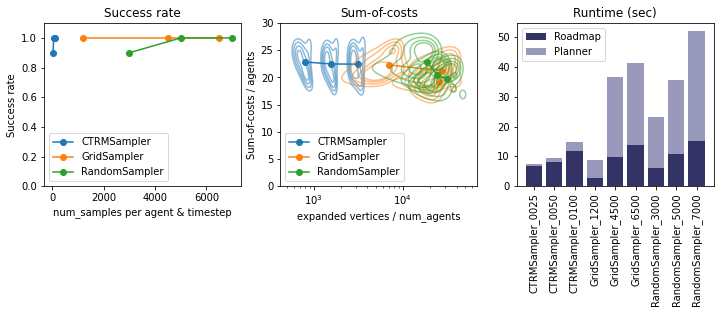

In [4]:
from jaxmapp.utils.viz import visualize_evaluation_results

dirname = "../data_example/eval_data/example"  # change this to "/workspace" if you are in the docker container

visualize_evaluation_results(dirname);

Note that the above evaluation uses the only 10 instances. If you run `scripts/eval_all.sh` you can evaluate default three samplers with several num_samples conditions on five different datasets created by `scripts/create_all_eval_data.sh`.

- standard: 21-30 agents of the same speed and size + 10 obstacles
- wo_obs: 21-30 agents of the same speed and size + no obstacles
- many_obs: 21-30 agents of the same speed and size + 20 obstacles
- more_agents: 31-40 agents of the same speed and size + no obstacles
- hetero: 21-30 agents of the random speed and size + no obstacles

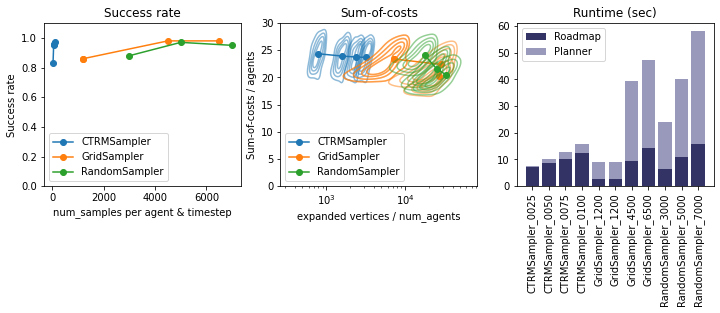

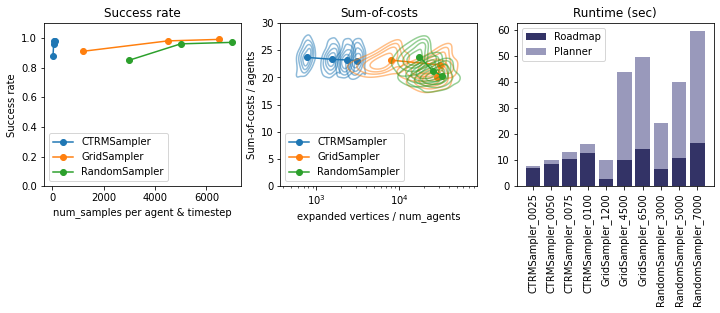

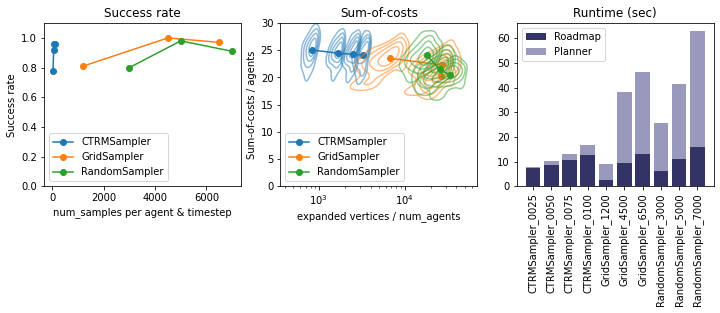

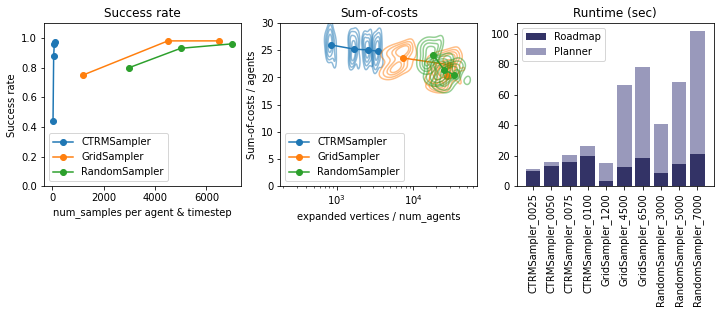

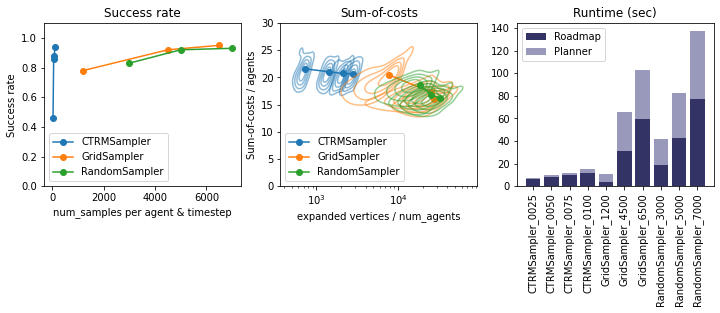

In [5]:
for dataset in ["standard", "wo_obs", "many_obs", "more_agents", "hetero"]:
    dirname = f"../data/eval_data/{dataset}/"
    visualize_evaluation_results(dirname);
